In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
patients = pd.read_csv('clevelanda.csv')

In [3]:
patients.head()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
gender      303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fps         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
class       303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 33.2+ KB


In [5]:
patients.describe()

,age,gender,cp,trestbps,chol,fps,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [6]:
for f in ['slope','ca','thal','cp','fps','restecg','exang']:
    print(patients[f].unique())

[3 2 1]
['0' '3' '2' '1' '?']
['6' '3' '7' '?']
[1 4 3 2]
[1 0]
[2 0 1]
[0 1]


In [7]:
print(patients['ca'].value_counts())
print(patients['thal'].value_counts())

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64
3    166
7    117
6     18
?      2
Name: thal, dtype: int64


In [8]:
ind = patients[(patients['ca'] == '?') | (patients['thal'] == '?')].index
patients.drop(ind, axis=0, inplace=True)

In [9]:
patients['ca'] = pd.to_numeric(patients['ca'])
patients['thal'] = pd.to_numeric(patients['thal'])

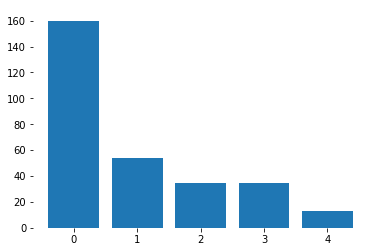

In [10]:
direc = ['right', 'left', 'top', 'bottom']

fig, ax = plt.subplots()
ax.bar(patients['class'].value_counts().index, patients['class'].value_counts())
for d in direc:
    ax.spines[d].set_visible(False)

In [11]:
col = ['slope','ca','thal','cp','fps','restecg','exang']
pre = ['sl','ca','thl','cp','fps','res','ex']
for i,c in enumerate(col):
    cat_dummies = pd.get_dummies(patients[c], prefix=pre[i])
    patients = pd.concat([patients, cat_dummies], axis=1)
    del patients[c]

In [12]:
cat_dummies = pd.get_dummies(patients['class'])
patients = pd.concat([patients, cat_dummies], axis=1)


In [13]:
patients.head()

,age,gender,trestbps,chol,thalach,oldpeak,class,sl_1,sl_2,sl_3,...,res_0,res_1,res_2,ex_0,ex_1,0,1,2,3,4
0,63,1,145,233,150,2.3,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0
1,67,1,160,286,108,1.5,2,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,67,1,120,229,129,2.6,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
3,37,1,130,250,187,3.5,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4,41,0,130,204,172,1.4,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0


In [14]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 33 columns):
age         297 non-null int64
gender      297 non-null int64
trestbps    297 non-null int64
chol        297 non-null int64
thalach     297 non-null int64
oldpeak     297 non-null float64
class       297 non-null int64
sl_1        297 non-null uint8
sl_2        297 non-null uint8
sl_3        297 non-null uint8
ca_0        297 non-null uint8
ca_1        297 non-null uint8
ca_2        297 non-null uint8
ca_3        297 non-null uint8
thl_3       297 non-null uint8
thl_6       297 non-null uint8
thl_7       297 non-null uint8
cp_1        297 non-null uint8
cp_2        297 non-null uint8
cp_3        297 non-null uint8
cp_4        297 non-null uint8
fps_0       297 non-null uint8
fps_1       297 non-null uint8
res_0       297 non-null uint8
res_1       297 non-null uint8
res_2       297 non-null uint8
ex_0        297 non-null uint8
ex_1        297 non-null uint8
0           297 non-null 

In [15]:
target = patients[[0,1,2,3,4]]
raw_data = patients.drop(columns = [0,1,2,3,4])

from sklearn.preprocessing import StandardScaler
conv = StandardScaler()
scaled_data = conv.fit_transform(raw_data)

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=15, svd_solver = 'full')
transformed_data = pca.fit_transform(scaled_data)

print(transformed_data.shape)
print(pca.explained_variance_ratio_*100)
print(pca.explained_variance_)

(297, 15)
[19.46861177  8.6691141   7.22488189  6.40701485  6.1273764   5.41531589
  5.22310267  4.77296972  4.5328655   4.32600119  3.90058184  3.53022254
  3.27676226  3.11002009  2.94464573]
[5.46962755 2.43555246 2.02980128 1.80002485 1.72146156 1.52141105
 1.46740952 1.34094649 1.27349018 1.2153725  1.09585266 0.99180171
 0.92059307 0.87374754 0.82728628]


In [17]:
#75% variance
threshold = 0.75
for_test = 0
order = 0

for i, r in enumerate(pca.explained_variance_ratio_):
    if threshold > for_test:
        for_test += r
    else:
        order = i+1
        break

variance_explained = pca.explained_variance_ratio_[:order].sum()*100
print(order)
print(variance_explained)

12
79.59805835898611


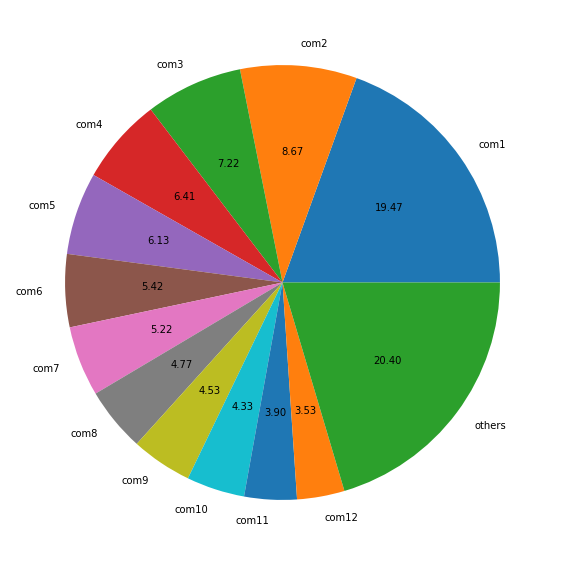

In [18]:
#Component visualization
com_col = ['com'+str(i+1) for i in range(order)]
com_col.append('others')

com_values = [i for i in pca.explained_variance_ratio_[:order]]
com_values.append(1-pca.explained_variance_ratio_[:order].sum())

plt.figure(figsize=(10,10))
plt.pie(com_values, labels=com_col, autopct='%.2f')
plt.show()

In [19]:
transformed_data

array([[ 0.57766497,  4.76651667,  1.32345733, ..., -0.0529599 ,
        -1.15717974, -0.50996905],
       [ 3.4341862 ,  0.59837485, -2.27981378, ...,  3.11543794,
        -0.83784167,  1.10606704],
       [ 3.92415905, -0.46379891, -0.5414593 , ..., -0.31484872,
         0.06329441,  0.6479595 ],
       ...,
       [ 2.9068768 ,  2.24236335,  3.15785289, ..., -0.3822707 ,
         0.59595161, -1.0515173 ],
       [ 3.4809285 , -2.43114398,  1.60181709, ...,  0.56543209,
         0.32442122, -0.88657973],
       [-1.02822051,  0.48760275, -2.21390034, ..., -0.44985245,
         0.19163572, -0.04279413]])

In [20]:

transformed_df = pd.DataFrame(transformed_data)
train = transformed_df.iloc[:225]
train_target = patients[[0,1,2,3,4]].iloc[:225]
test = transformed_df.iloc[225:]
test_target = patients[[0,1,2,3,4]].iloc[225:]

In [21]:
from sklearn.linear_model import LogisticRegression
features = train.iloc[:,:order]

targets = [0,1,2,3,4]

models={}
for t in targets:
    log = LogisticRegression()
    log.fit(features, train_target[t])
    models[t] = log

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:433: 

In [23]:
unique_class = patients['class'].unique()
testing_probs = pd.DataFrame(columns = unique_class)
for o in unique_class:
    testing_probs[o] = models[o].predict_proba(test.iloc[:,:order])[:,1]

In [24]:
testing_probs

,0,2,1,3,4
0,0.027234,0.278575,0.447851,0.154022,0.039424
1,0.085508,0.157698,0.472448,0.052264,0.025146
2,0.979827,0.017640,0.100070,0.008004,0.009006
3,0.088911,0.144606,0.236005,0.011690,0.057512
4,0.618443,0.042984,0.099687,0.042964,0.057286
5,0.361039,0.178833,0.356056,0.011498,0.007523
6,0.970550,0.039623,0.166513,0.003920,0.004813
7,0.006185,0.210640,0.249028,0.506067,0.093160
8,0.042067,0.104740,0.080871,0.616953,0.051922
9,0.350170,0.030742,0.204090,0.081377,0.080409


In [25]:
predicted_origins = testing_probs.idxmax(axis=1)

In [40]:
y = patients.iloc[225:]['class'].reset_index().drop('index', axis=1)

In [47]:
y['pred'] = predicted_origins

In [58]:
acc=[]

for i in range(len(y)):
    if y.loc[i,'class'] == y.loc[i,'pred']:
        acc.append(1)
    else:
        acc.append(0)


In [59]:
accuracy = np.sum(acc)/len(acc)*100
accuracy

56.94444444444444